**Lesson 13 - Text Feature Selection Part II**

* Topic models
* Word2Vec
* GloVe
* FastText

In [1]:
%%capture
%run text_feature_selection_partI.ipynb

## Topic Model

We can use some summarization techniques to extract topic- or concept-based features from text documents. The idea of topic models revolves around the process of extracting `key themes` or `key concepts` from a corpus of documents, which are represented as topics. 
* Each topic can be represented as a bag or collection of words/terms from the document corpus. 
* Together, these terms signify a specific topic, theme, or a concept and each topic can be easily distinguished from other topics by virtue of the semantic meaning conveyed by these terms.

Topic models are extremely useful in summarizing large corpus of text documents to extract and depict key concepts. They are also useful in extracting features from text data that capture latent patterns in the data.

There are various techniques for topic modeling and most of them involve some form of matrix decomposition. 
* Some techniques like `Latent Semantic Indexing (LSI)` use matrix decomposition operations, more specifically `Singular Valued Decomposition`. 
* Another technique is called `Latent Dirichlet Allocation (LDA)`, which uses a generative probabilistic model, where each document consists of a combination of several topics and each term or word can be assigned to a specific topic. 

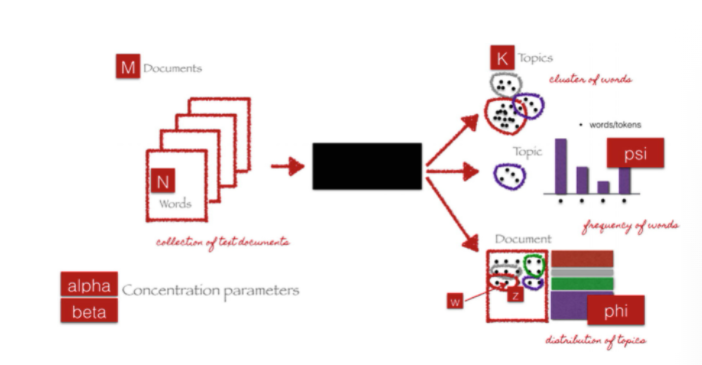

The black box represents the core algorithm that uses the previously mentioned parameters to extract `K` topics from `M` documents. 

Major steps in the LDA topic modeling algorithm are summarized below:

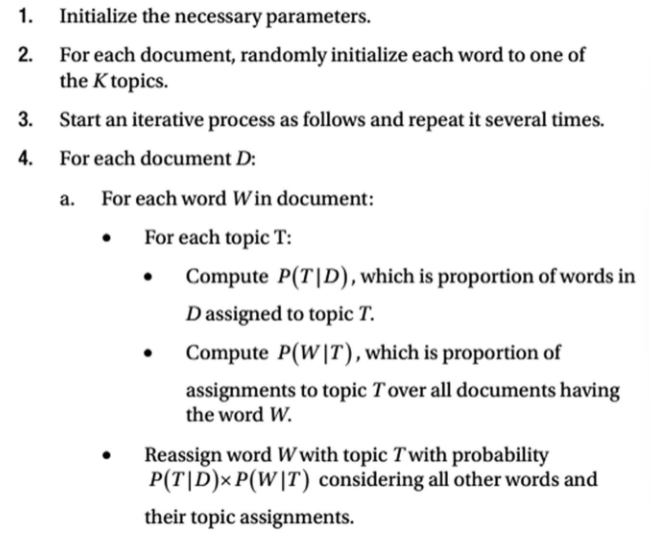

Once this runs for several iterations, we should have topic mixtures for each document and then generate the constituents of each topic from the terms that point to that topic. 

Frameworks like Gensim or Scikit-Learn enable us to leverage the LDA model for generating topics. When LDA is applied to a document-term matrix (TF-IDF or Bag of Words feature matrix), it is broken into two main components:
* A document-topic matrix, which would be the feature matrix we are looking for.
* A topic-term matrix, which helps us look at potential topics in the corpus.

In [2]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3, max_iter=10000, random_state=0)
dt_matrix = lda.fit_transform(cv_matrix)
features = pd.DataFrame(dt_matrix, columns=['T1', 'T2', 'T3'])
features

T1        T2        T3
0  0.832191  0.083480  0.084329
1  0.863554  0.069100  0.067346
2  0.047794  0.047776  0.904430
3  0.037243  0.925559  0.037198
4  0.049121  0.903076  0.047802
5  0.054902  0.047778  0.897321
6  0.888287  0.055697  0.056016
7  0.055704  0.055689  0.888607

You can see which documents contribute the most to which of the three topics in this output. You can view the topics and their main constituents as follows.

In [3]:
tt_matrix = lda.components_
for topic_weights in tt_matrix:
    topic = [(token, weight) for token, weight in zip(vocab, topic_weights)]
    topic = sorted(topic, key=lambda x: -x[1])
    topic = [item for item in topic if item[1] > 0.6]
    print(topic)
    print()

[('sky', 4.332439442470133), ('blue', 3.373774254787669), ('beautiful', 3.3323650509884386), ('today', 1.3325579855138985), ('love', 1.330415818217548)]

[('bacon', 2.33269586574902), ('eggs', 2.33269586574902), ('ham', 2.33269586574902), ('sausages', 2.33269586574902), ('love', 1.3354610533796558), ('beans', 1.3327735190105536), ('breakfast', 1.3327735190105536), ('kings', 1.3327735190105536), ('toast', 1.3327735190105536), ('green', 1.3325431515674175)]

[('brown', 3.3323473548404405), ('dog', 3.3323473548404405), ('fox', 3.3323473548404405), ('lazy', 3.3323473548404405), ('quick', 3.3323473548404405), ('jumps', 1.3324193772908193), ('blue', 1.2919423137963386)]



You can see the three topics are quite distinguishable from each other based on their constituent terms. 
* The first one is talking about weather, 
* the second one is about food, 
* and the last one is about animals. 
Choosing the number of topics for topic modeling is an entire technique of its own and is an art as well as a science. There are various methods and heuristics to get the optimal number of topics, but due to the detailed nature of these techniques. 

Further materials available for students interested in setting this number of topics (n_components).

### Word2Vec Model

This model was created by Google in 2013. It is a predictive deep learning based model to compute and generate high quality, distributed, and continuous dense vector representations of words that capture `contextual` and `semantic` similarity.

Essentially these are unsupervised models that can take in massive textual corpora, create a vocabulary of possible words, and generate dense word embeddings for each word in the vector space representing that vocabulary. 

Usually, you can specify the size of the word embedding vectors and the total number of vectors are essentially the size of the vocabulary. This makes the dimensionality of this dense vector space much lower than the high-dimensional sparse vector space built using traditional Bag of Words models.

There are two different model architectures that can be leveraged by Word2Vec to create these word embedding representations. These include:
* The Continuous Bag of Words (CBOW) model
* The Skip-Gram model

#### The Continuous Bag of Words (CBOW) Model

The [CBOW model architecture](https://arxiv.org/pdf/1301.3781.pdf) tries to predict the current target word (the center word) based on the source context words (surrounding words). 

Considering a simple sentence, `the quick brown fox jumps over the lazy dog`, this can be pairs of (`context_window`, `target_word`), where if we consider a context window of size 2, we have examples like `([quick, fox], brown)`, `([the, brown], quick)`, `([the, dog], lazy)`, and so on. Thus, the model tries to predict the `target_word` based on the `context_window` words.

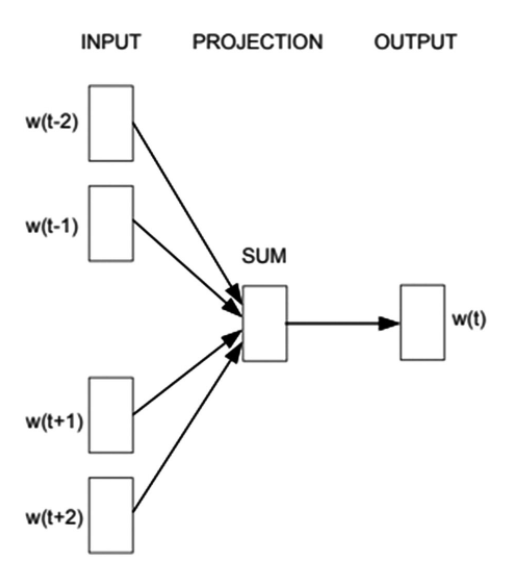

Because the Word2Vec family of models is unsupervised, you can just give it a corpus without additional labels or information and it can construct dense word embeddings from the corpus. But you still need to leverage a supervised, classification methodology once you have this corpus to get to these embeddings. 

We can model this CBOW architecture as a deep learning classification model such that we take in the context words as our input, `X`, and try to predict the target word, `Y`. In fact, building this architecture is simpler than the Skip-Gram model, whereby we try to predict a whole bunch of context words from a source target word.

#### The Skip-Gram Model
We now explore the Skip-Gram architecture, which often gives better results than CBOW.

The Skip-Gram model architecture tries to achieve the reverse of what the CBOW model does. It tries to predict the source context words (surrounding words) given a target word (the center word). 

Consider our simple sentence from earlier, `the quick brown fox jumps over the lazy dog`. If we used the CBOW model, we get pairs of `(context_window, target_word)`, where if we consider a context window of size 2, we have examples such as `([quick, fox], brown)`, `([the, brown], quick)`, `([the, dog], lazy)` and so on. 

Now, considering that the Skip-Gram model’s aim is to predict the context from the target word, the model typically inverts the contexts and targets and tries to predict each context word from its target word. 

Hence the task becomes to predict the context `[quick, fox]`, given target word `brown` or `[the, brown]` given target word `quick`, and so on. Thus the model tries to predict the `context_window` words based on the `target_word`. See

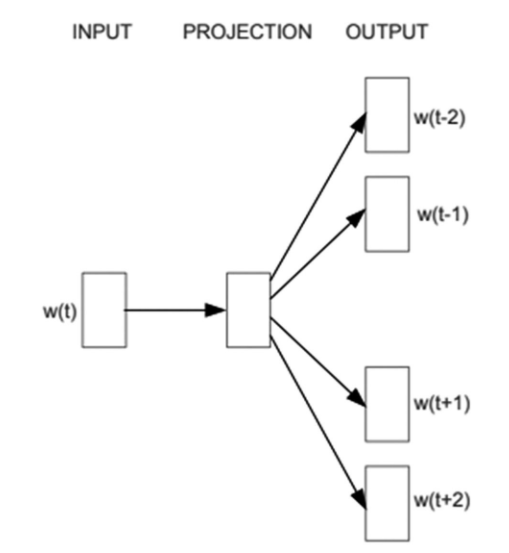



We need to model this Skip-Gram architecture as a deep learning classification model, so we take in the target word as our input and try to predict the context words. This becomes slightly complex since we have multiple words in our context. We simplify this further by breaking down each `(target, context_words)` pair into `(target, context)` pairs so the context consists of only one word. Hence our dataset from earlier gets transformed into pairs like `(brown, quick)`, `(brown, fox)`, `(quick, the)`, `(quick, brown)`, and so on. But how do we supervise or train the model to know what is contextual and what is not?

We feed our Skip-Gram model pairs of `(X, Y)`, where `X` is our input and `Y` is our label. 
* We do this by using `[(target, context), 1]` pairs as positive input samples, where target is our word of interest and context is a context word occurring near the target word. The positive label 1 indicates this is a contextually relevant pair. 
* We also feed in `[(target, random), 0]` pairs as negative input samples, where target is again our word of interest but random is just a randomly selected word from our vocabulary and it has no context or association with our target word. Hence the negative label 0 indicates this is a contextually irrelevant pair. 
* We do this so that the model can then learn which pairs of words are contextually relevant and which are not and then generate similar embeddings for semantically similar words.